In [16]:
import pandas as pd
data = pd.read_csv('data.CSV')
data.dropna()
data.head()

,HOSPNUM,RDELAY,RCONSC,SEX,AGE,RSLEEP,RATRIAL,RCT,RVISINF,RHEP24,...,DEAD8,H14,ISC14,NK14,STRK14,HTI14,PE14,DVT14,TRAN14,NCB14
0,1,17,D,M,69,Y,NaN,Y,Y,NaN,...,0,0,0,0,0,0,0,0,0,0
1,1,10,F,M,76,Y,NaN,Y,N,NaN,...,0,0,0,0,0,0,0,0,0,0
2,1,43,F,F,71,N,NaN,Y,N,NaN,...,0,0,0,0,0,0,0,0,0,0
3,1,6,F,M,81,N,NaN,N,N,NaN,...,0,0,0,0,0,0,0,0,0,0
4,4,20,F,M,78,N,NaN,N,N,NaN,...,0,0,0,0,0,0,0,0,0,0


In [13]:
data.groupby('DDIAGISC')['DRSISC'].value_counts() / data.groupby('DDIAGISC')['DRSISC'].count()
data.groupby('DDIAGISC')['DRSISC'].value_counts() / data.groupby('DDIAGISC')['DRSISC'].count()

DDIAGISC  DRSISC
N         N         0.993487
          Y         0.005511
          U         0.001002
U         N         0.562500
          U         0.375000
          Y         0.062500
Y         N         0.977004
          Y         0.022939
          U         0.000057
u         N         1.000000
Name: DRSISC, dtype: float64

In [34]:
target = data[['DDIAGISC', 'DDIAGHA', 'DDIAGUN', 'DNOSTRK', 'DRSISC', 'DRSH']]
target.dropna()
strk1 = []
for row in target[['DDIAGISC', 'DDIAGHA','DDIAGUN']].values:
    row = list(row)
    try:
        strk1.append(row.index('Y'))
    except:
        strk1.append(-1)
strk1[1:5]

[0, 0, 0, 0]

In [37]:
strk2= []
for row in target[['DRSISC', 'DRSH']].values:
    row = list(row)
    try:
        strk2.append(row.index('Y'))
    except:
        strk2.append(-1)

In [40]:
transactions = pd.DataFrame({
    'strk1': strk1,
    'strk2': strk2
})

In [55]:
transactions = transactions[transactions['strk2'] != -1]
transactions.head()

,strk1,strk2
32,2,0
42,0,0
44,0,0
196,2,0
216,0,0


In [56]:
import matplotlib.pyplot as plt
result = transactions.groupby('strk1')['strk2'].value_counts()/transactions.groupby('strk1')['strk2'].count() * 100

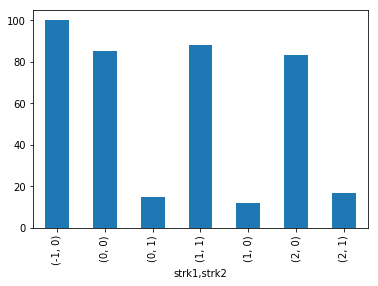

In [60]:
result.plot.bar()
plt.show()

,strk1,strk2
32,2,0
42,0,0
44,0,0
196,2,0
216,0,0
